The Basic ML Workflow
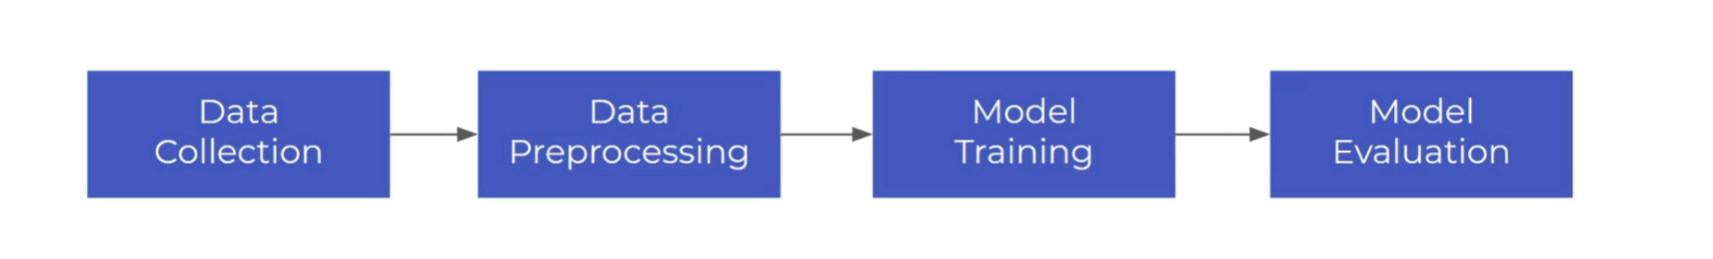

Data are collected from the Kaggle and loaded using pandas read_csv </br> 
https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download

# Data Collection 

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
# we want to see evey collection 
pd.set_option('display.max_columns', None)


In pandas, the low_memory parameter is used in the read_csv() function to indicate whether the function should try to automatically infer the data type of each column based on its content, or whether it should read the entire data set as the same data type to save memory. By default, low_memory is set to True, which means that pandas will try to infer the data types of the columns as it reads the data.

Setting low_memory to False can be useful in some cases where the data set is very large or has many columns with varying data types. In these cases, pandas may not be able to infer the correct data type for each column, which can result in the wrong data being loaded into memory. Setting low_memory to False forces pandas to read the entire data set as the same data type, which can help avoid these issues.

However, setting low_memory to False can also lead to much higher memory usage, as the entire data set will be loaded into memory at once. This can be problematic if the data set is very large and you do not have enough memory available on your computer. Therefore, it is generally recommended to leave low_memory set to its default value of True unless you have a specific reason to change it.

In [111]:
train_df = pd.read_csv("../dataset/train.csv", low_memory=False) 
test_df = pd.read_csv("../dataset/test.csv", low_memory=False)

The Problem are with the following columns 
- Age 
- Num_of_Loan 
- Num_of_Delayed_Payment 
- Changed_Credit_Limit     
- Outstanding_Debt  
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance

In [112]:
# Concatinating both data as there are large number of missing values 
df = pd.concat([train_df, test_df], ignore_index = True )

In [92]:
df.isna().sum() / len(df) * 100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         2.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Bala

In [93]:
# The number of information particularly increases 

In [94]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       150000 non-null  object
 1   Customer_ID              150000 non-null  object
 2   Month                    150000 non-null  object
 3   Name                     135000 non-null  object
 4   Age                      150000 non-null  object
 5   SSN                      150000 non-null  object
 6   Occupation               150000 non-null  object
 7   Annual_Income            150000 non-null  object
 8   Num_of_Loan              150000 non-null  object
 9   Type_of_Loan             132888 non-null  object
 10  Num_of_Delayed_Payment   139500 non-null  object
 11  Changed_Credit_Limit     150000 non-null  object
 12  Credit_Mix               150000 non-null  object
 13  Outstanding_Debt         150000 non-null  object
 14  Credit_History_Age  

In [95]:
# for col in df.columns:
#     print('Column Name: '+col)
#     print("**"*20)
#     print(df[col].value_counts(dropna=False))
#     print('END', "--"*18, '\n')

Some Unwanted Values in the datasets 
- !@9#%8- 11400 in the Payment_Behaviour
- #F%$D@*&8 - 2829 in the SSN 
- NaN values in various columns  

In [96]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')
                      ).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [97]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month
df['Age'] = df.Age.astype(int)     
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [98]:
# define a function to convert the credit history age  to the number of months
def duration_to_months(duration):
    if pd.isna(duration):
        return np.nan
    else:
        years, months = duration.split(' Years and ')
        months = months.strip(' Months')
        return int(years) * 12 + int(months)

In [99]:
# Handling Credit History Age 
df['Credit_History_Age'] = df['Credit_History_Age'].apply(duration_to_months)

In [100]:
def get_Diff_Values_Colum(df_column, diff_value = []):   
    column = df_column.dropna()
    for i in column:
        if ',' not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [101]:
get_Diff_Values_Colum(df['Type_of_Loan'])


{0: 'Auto Loan',
 1: 'Credit-Builder Loan',
 2: 'Debt Consolidation Loan',
 3: 'Home Equity Loan',
 4: 'Mortgage Loan',
 5: 'Not Specified',
 6: 'Payday Loan',
 7: 'Personal Loan',
 8: 'Student Loan'}

In [102]:
def Reassign_Group_Object_NaN_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
            
        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
    
    # Run      
    if inplace:  
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
#         print(f'\nBefore Assigning NaN {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        a = df.groupby(groupby)[column].apply(list) 
#         print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
#         print(f'\nAfter Assigning NaN {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        b = df.groupby(groupby)[column].apply(list)
#         print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [103]:
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Name')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Occupation')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Credit_Mix')
Reassign_Group_Object_NaN_Values(df, 'Customer_ID', 'Payment_Behaviour')

In [104]:
# Define Outlier Range
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [105]:
# Reassign Wrong Values and Show Function
def Reassign_Group_Numeric_Wrong_Values(df, groupby, column, inplace=True):      
    import scipy.stats as stats 

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):            
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]
    
    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result
        
    
    # Run      
    if inplace:   
#         print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')       
        mini, maxi = get_group_min_max(df, groupby, column)        
#         print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')
        
        # Before Assigning Wrong values      
        x = df[column].value_counts(dropna=False).head(1)
#         print(f'\nBefore Assigning Min, Max {column}:', [x if x.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        a = df.groupby(groupby)[column].apply(list) 
#         print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')
        
        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)
        
        # After Assigning Wrong values
        y = df[column].value_counts(dropna=False).head(1)
#         print(f'\nAfter Assigning  Min, Max {column}:', [y if y.index[0] is np.NaN or x.index[0] is None else 'No NaN Value'] , end='\n')
        
        b = df.groupby(groupby)[column].apply(list)
#         print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:   
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

In [106]:
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Age')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'SSN')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Annual_Income')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Inhand_Salary')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Bank_Accounts')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Card')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Interest_Rate')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Loan')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Delay_from_due_date')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_of_Delayed_Payment')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Changed_Credit_Limit')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Num_Credit_Inquiries')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Outstanding_Debt')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Total_EMI_per_month')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Amount_invested_monthly')
Reassign_Group_Numeric_Wrong_Values(df, 'Customer_ID', 'Monthly_Balance')

In [107]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                           12
Age                             0
SSN                             0
Occupation                      6
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                    908
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour             804
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [108]:
df.Credit_History_Age

0         265.0
1           NaN
2         267.0
3         268.0
4         269.0
          ...  
149995      NaN
149996    383.0
149997    384.0
149998    385.0
149999    386.0
Name: Credit_History_Age, Length: 150000, dtype: float64

In [ ]:
df['Name'].unique()

In [ ]:
train_df['Age'] = pd.to_numeric(train_df['Age'], errors = 'coerce')
train_df['Annual_Income'] = pd.to_numeric(train_df['Annual_Income'], errors = 'coerce')
train_df['Num_of_Loan'] = pd.to_numeric(train_df['Num_of_Loan'], errors = 'coerce')
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'], errors = 'coerce')
train_df['Changed_Credit_Limit'] = pd.to_numeric(train_df['Changed_Credit_Limit'], errors = 'coerce')
train_df['Outstanding_Debt'] = pd.to_numeric(train_df['Outstanding_Debt'], errors = 'coerce')
train_df['Amount_invested_monthly'] = pd.to_numeric(train_df['Amount_invested_monthly'], errors = 'coerce')
train_df['Monthly_Balance'] = pd.to_numeric(train_df['Monthly_Balance'], errors = 'coerce')

In [ ]:
# define a function to convert the credit history age  to the number of months
def duration_to_months(duration):
    if pd.isna(duration):
        return np.nan
    else:
        years, months = duration.split(' Years and ')
        months = months.strip(' Months')
        return int(years) * 12 + int(months)
# Handling Credit History Age 
train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(duration_to_months)
# Handling Age 
train_df['Age'] = train_df['Age'].apply(lambda x: np.nan if x < 0 or x > 122 else x)


In [ ]:
# handling SSN 
train_df['SSN'] = train_df['SSN'].replace('#F%$D@*&8', np.nan)

In [ ]:
train_df['Customer_ID'].unique()

In [ ]:
train_df.isna().sum()

# Basic Statistics of the data 

In [ ]:
train_df.describe()

In [ ]:
print(f"Training Data:\nno of rows: {train_df.shape[0]}\nno of columns: {train_df.shape[1]}")
print()
print(f"Testing Data:\nno of rows: {test_df.shape[0]}\nno of columns: {test_df.shape[1]}")


The testing data doesn't contain the target variable <b> Credit Score </b> 

In [ ]:
train_df.dtypes

In [ ]:
train_df.dtypes.value_counts()

In [ ]:
# From the 

In [ ]:
train_df.dtypes

## Checking missing values in the dataset 

In [ ]:
missing_train = train_df.isna().sum()/len(train_df) * 100  #percentage of missing value  in trainining dataset 
missing_test = test_df.isna().sum()/len(test_df) * 100 # percentage of missing value in testing dataset 

In [ ]:
missing_train_sorted =missing_train.sort_values(ascending = False)
missing_test_sorted = missing_test.sort_values(ascending= False)

In [ ]:
missing_train_sorted

In [ ]:
missing_test_sorted

Both training and testing dataset have missing values with <b>Monthly_Inhand_Salary</b> with more missing percentile in both. Further analysis needs to be done to be able to say what needs to be done with this missing values 

In [ ]:
train_columns = train_df.columns 
test_columns = test_df.columns 
print(train_columns)

Corelation heatmap for datasets

In [ ]:
# Create a correlation matrix and display it as a heatmap
corr = train_df.corr()
sns.heatmap(corr, center=0)
plt.show()

In [ ]:
X = train_df.drop('Credit_Score', axis = 1)
y = train_df['Credit_Score']

In [ ]:
#finding the correlation of the various features with the Credit_Score 
corr_matrix = X.corrwith(y)
corr_series = corr_matrix['Credit_Score'].sort_values(ascending=False)

corr_series